# Happiness Score of Countries Analysis (2022 data)


## Introduction

This analyses the World Happiness Report 2022. 
We analyse global happiness scores and the contributing factors like GDP per capita, social support, health, etc., and visualize insights .  
Happiness report 2022 - https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2022  
continent - https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region




### Libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
# reading data
file1 = "World Happiness Report 2022.csv"
file2='continents2.csv'
try:
    df1 = pd.read_csv(file1)
    print(f"'{file1}' Loaded successfully")
except FileNotFoundError:
    print(f"'{file1}' File not found")
except Exception as e:
    print("Unexpected error occured")

try:
    df2 = pd.read_csv(file2)
    print(f"'{file2}' Loaded successfully")
except FileNotFoundError:
    print(f"'{file2}' File not found")
except Exception as e:
    print("Unexpected error occured")




'World Happiness Report 2022.csv' Loaded successfully
'continents2.csv' Loaded successfully


### Basic information

In [3]:
# basic info of Happiness report

print(f"INFO of Hapiness report\n")
df1.info()

print("DESCRIBE:")
print(df1.describe())


print(f"HEAD\n{df1.head()}")

print(f"total null values per column = {df1.isnull().sum()}")


INFO of Hapiness report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    fl

### Data cleaning

In [4]:
# Standardize Country name
# many name had '*' at end remove it
df1['Country']  = df1['Country'].str.strip().str.title().str.replace('*', '')

### Merge both file into one cleaned_data.csv file

In [5]:
# drop unnecessary columns from df2
df2 = df2.drop(columns=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2',
       'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'])


# change column name 'name' in df2 to 'Country'
df2 = df2.rename(columns={'name':'Country'})
df2.head(1) # confirm name change

# merge both dataframe 
df = pd.merge(df1, df2, on='Country', how='left')


df.isna().sum()
display(df[df['region'].isna()]['Country'])
# 9 columns have missing region and subregion

17                       Czechia
25      Taiwan Province Of China
31                        Kosovo
78                  North Cyprus
80     Hong Kong S.A.R. Of China
87                   Ivory Coast
88               North Macedonia
121      Palestinian Territories
124         Eswatini, Kingdom Of
Name: Country, dtype: object

In [6]:
# Fill empty regions and sub-regions
# Define the region/subregion mappings for these specific countries
region_mapping = {
    'Czechia': {'Region': 'Europe', 'Subregion': 'Eastern Europe'},
    'Taiwan Province Of China': {'Region': 'Asia', 'Subregion': 'Eastern Asia'},
    'Kosovo': {'Region': 'Europe', 'Subregion': 'Southern Europe'},
    'North Cyprus': {'Region': 'Asia', 'Subregion': 'Western Asia'},
    'Hong Kong S.A.R. Of China': {'Region': 'Asia', 'Subregion': 'Eastern Asia'},
    'Ivory Coast': {'Region': 'Africa', 'Subregion': 'Western Africa'},
    'North Macedonia': {'Region': 'Europe', 'Subregion': 'Southern Europe'},
    'Palestinian Territories': {'Region': 'Asia', 'Subregion': 'Western Asia'},
    'Eswatini, Kingdom Of': {'Region': 'Africa', 'Subregion': 'Southern Africa'}
}



# convert the dictionary to dataframe
# .T to Transpose ( convert country as column from rows) 
# .T transposes the dictionary so that keys become rows and values become columns
# cnage column names of temp_df
temp_df = pd.DataFrame.from_dict(region_mapping).T.reset_index()
temp_df.columns = ['Country', 'region', 'sub-region']
temp_df


,Country,region,sub-region
0,Czechia,Europe,Eastern Europe
1,Taiwan Province Of China,Asia,Eastern Asia
2,Kosovo,Europe,Southern Europe
3,North Cyprus,Asia,Western Asia
4,Hong Kong S.A.R. Of China,Asia,Eastern Asia
5,Ivory Coast,Africa,Western Africa
6,North Macedonia,Europe,Southern Europe
7,Palestinian Territories,Asia,Western Asia
8,"Eswatini, Kingdom Of",Africa,Southern Africa


In [7]:

# merge the df dataframe with temp_df
# since both df and temp_df had column region, sub-region
# 4 column region_x, sub_region_x region_y, sub_region_y
# suffixes=('_orig', ''new) will change _x, _y

temp_df = pd.merge(df, temp_df, on='Country', how='left', suffixes=('_orig', '_new'))


# create new columns region and sub_region by merging the region_orig, region_new column...
temp_df['region']  = temp_df['region_orig'].combine_first(temp_df['region_new'])
temp_df['sub-region'] = temp_df['sub-region_orig'].combine_first(temp_df['sub-region_new'])

# drop older region_orig, etc. coluumns and store df
df =  temp_df.drop(columns=['region_orig', 'region_new', 'sub-region_orig', 'sub-region_new'])


In [8]:
# Finding total missing values in each column

def check_missing():
    missing_count = df.isnull().sum()
    display(missing_count)
 

    missing_cols = missing_count[missing_count > 0]
    print("columns thats have missing values", missing_cols)

    if missing_cols.empty:
        print("No missing values")
        return 0
    return len(missing_cols)



# check missing values and fill 'Unkown' to missing values
if check_missing() == 0:
    print("Procceed")
else:
    df.fillna('Unknown', inplace=True)
    print("Filled 'Unknown' in missing places ")

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
region                                        0
sub-region                                    0
dtype: int64

columns thats have missing values Series([], dtype: int64)
No missing values
Procceed


### Helping variables for large column names and numeric column names

In [9]:

df.head(1)
# helping variables for large column names

print("Old column names = ",df.columns)

rank_col = "RANK"
country_col = "Country"
score = "Happiness score"
whigh = "Whisker-high"
wlow = "Whisker-low"
dystopia = "Dystopia (1.83) + residual"
gdp_col = "Explained by: GDP per capita"
social_support = "Explained by: Social support"
health = "Explained by: Healthy life expectancy"
freedom_col = "Explained by: Freedom to make life choices"
generosity = "Explained by: Generosity"
corruption = "Explained by: Perceptions of corruption"

new_col_name = [
    "rank_col",                                  # RANK
    "country_col",                               # Country
    "score",                                     # Happiness score
    "whigh",                          # Whisker-high
    "wlow",                           # Whisker-low (Note: Typo here? Should it be "Whisker-low" or "Whisker-low"?)
    "dystopia",            # Dystopia (1.83) + residual
    "gdp_col",                        # Explained by: GDP per capita
    "social_support",                        # Explained by: Social support
    "health",               # Explained by: Healthy life expectancy
    "freedom_col",          # Explained by: Freedom to make life choices
    "generosity",                            # Explained by: Generosity
    "corruption"              # Explained by: Perceptions of corruption
]

numeric_cols = [score, whigh, wlow, dystopia, gdp_col, social_support, health, freedom_col, generosity, corruption]
print("Numeric columns = ",numeric_cols)

print("\nAlternate names for column names")
for i, (old_name, new_name) in enumerate(zip(df1.columns, new_col_name)):
    print(f"{i}. {old_name}\t-> {new_name}")


Old column names =  Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'region', 'sub-region'],
      dtype='object')
Numeric columns =  ['Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual', 'Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']

Alternate names for column names
0. RANK	-> rank_col
1. Country	-> country_col
2. Happiness score	-> score
3. Whisker-high	-> whigh
4. Whisker-low	-> wlow
5. Dystopia (1.83) + residual	-> dystopia
6. Explained by: GDP per capita	-> gdp_col
7. Expl

### Save cleaned data to a csv file

In [10]:
# save the cleaned data to file 'cleaned_data.csv'

df.to_csv("cleaned_data.csv")
print("Cleaned data saved to 'cleaned_data.csv'")

Cleaned data saved to 'cleaned_data.csv'


### Analysis begins

In [11]:
# Analysis
# Top 10 and bottom 10 nations in happiness score
top10 = df.head(10)
bottom10 = df.tail(10)
print("Top 10 happiest nations:")
display(top10)
print("Bottom 10 nations:")
display(bottom10)


Top 10 happiest nations:


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,region,sub-region
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Europe,Northern Europe
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Europe,Northern Europe
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Europe,Northern Europe
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Europe,Western Europe
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Europe,Western Europe
5,6,Luxembourg,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388,Europe,Western Europe
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512,Europe,Northern Europe
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474,Europe,Northern Europe
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143,Asia,Western Asia
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483,Oceania,Australia and New Zealand


Bottom 10 nations:


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,region,sub-region
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083,Africa,Sub-Saharan Africa
137,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157,Africa,Sub-Saharan Africa
138,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270,Africa,Sub-Saharan Africa
139,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055,Africa,Sub-Saharan Africa
140,141,Lesotho,3.512,3.748,3.276,1.312,0.839,0.848,0.000,0.419,0.076,0.018,Africa,Sub-Saharan Africa
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102,Africa,Sub-Saharan Africa
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544,Africa,Sub-Saharan Africa
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105,Africa,Sub-Saharan Africa
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034,Asia,Western Asia
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005,Asia,Southern Asia


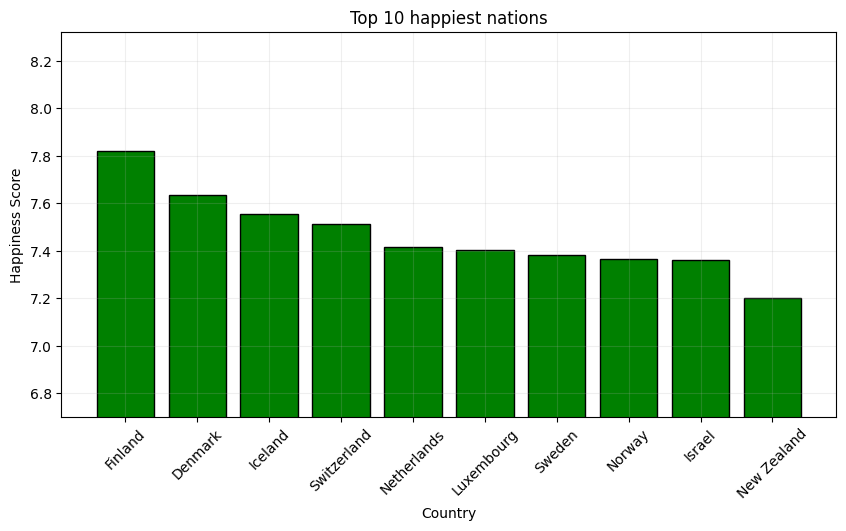

In [12]:
#  bar plot of top 10 happiest nation using matplotlib


plt.figure(figsize=(10,5))
plt.title("Top 10 happiest nations")
plt.bar(top10['Country'], top10[score], color="green", edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.ylim(top10[score].min() -0.5 , top10[score].max() +0.5)
plt.grid(alpha=0.2)
plt.show()



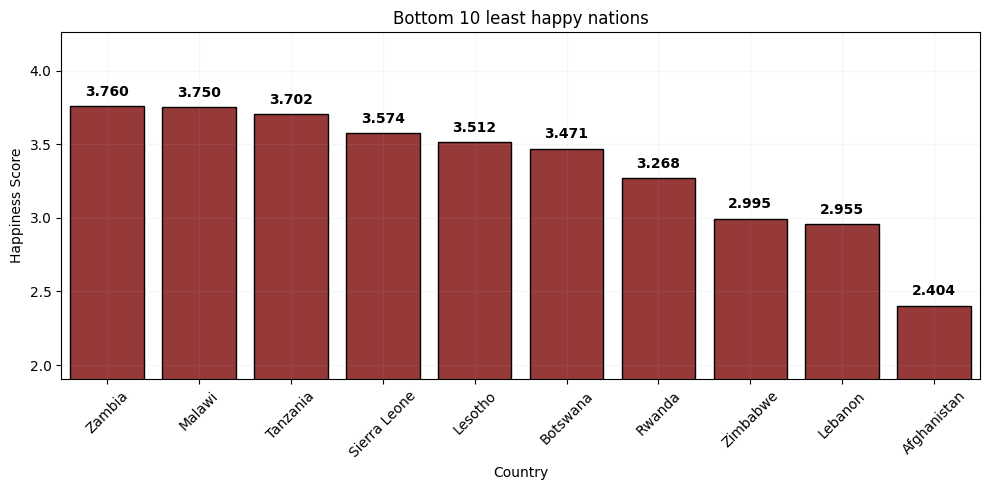

In [13]:
#  bar plot of bottom 10 happiest nation using seaborn


plt.figure(figsize=(10,5))
plt.title("Bottom 10 least happy nations")

ax = sns.barplot(x='Country', y=score, data=bottom10, color='brown', edgecolor='black')

plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)


plt.ylim(bottom10[score].min() -0.5 , bottom10[score].max() +0.5)

plt.grid(alpha=0.1)

# annotations
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = height + 0.05
    
    ax.text(x=x, y=y, 
            s=f"{height:.3f}",
            ha='center',
            va='bottom',
            fontweight='bold')
plt.tight_layout()

plt.show()

Correlation matrix


,Explained by: GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Happiness score
Explained by: GDP per capita,1.000,0.722,0.459,0.764
Explained by: Social support,0.722,1.000,0.480,0.778
Explained by: Freedom to make life choices,0.459,0.480,1.000,0.625
Happiness score,0.764,0.778,0.625,1.000


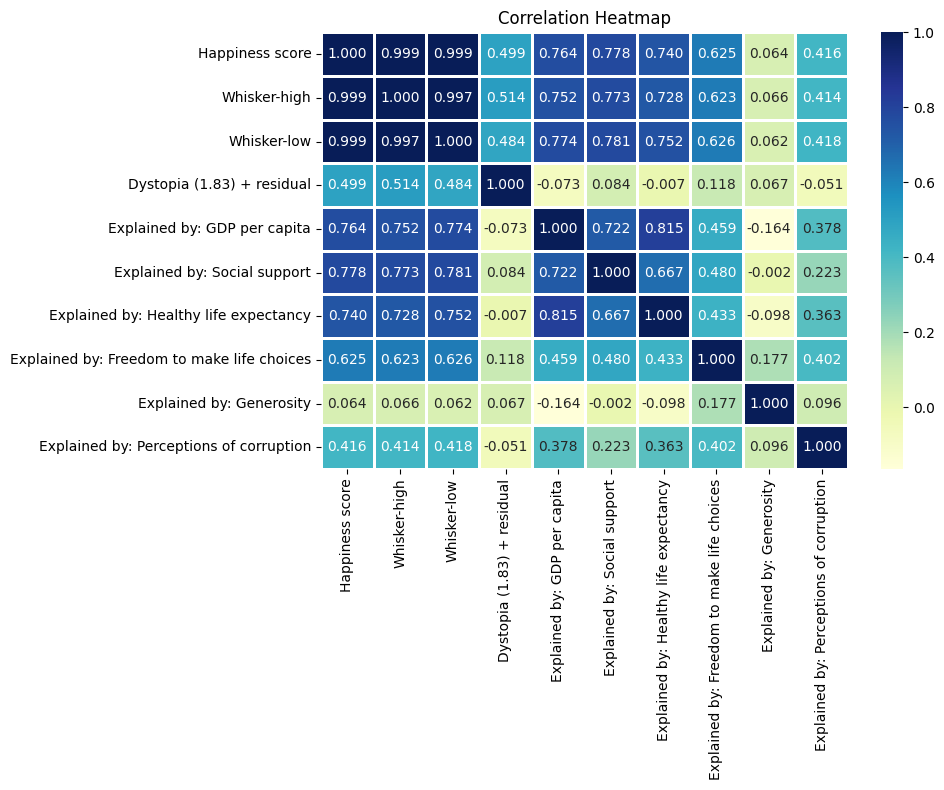

In [16]:
# correlation of gdp, social support, freedom, happiness score

print("Correlation matrix")
display(df[[gdp_col, social_support, freedom_col, score ]].corr().round(3))

# correlation heatmap
numeric_df = df[numeric_cols] # creating dataframe of numeric columns
numeric_df_cor = numeric_df.corr() # corelation of it

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df_cor, annot=True, fmt='.3f',  cmap='YlGnBu', linewidths=1)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

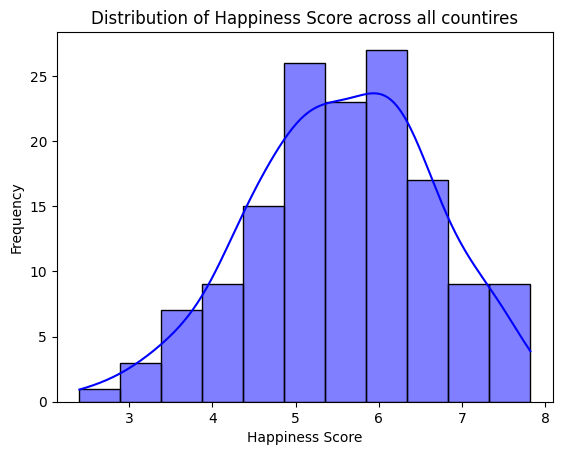

In [17]:
# histogram using seaborn

sns.histplot(df[score], kde=True, bins='auto', color='blue')
plt.title('Distribution of Happiness Score across all countires')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


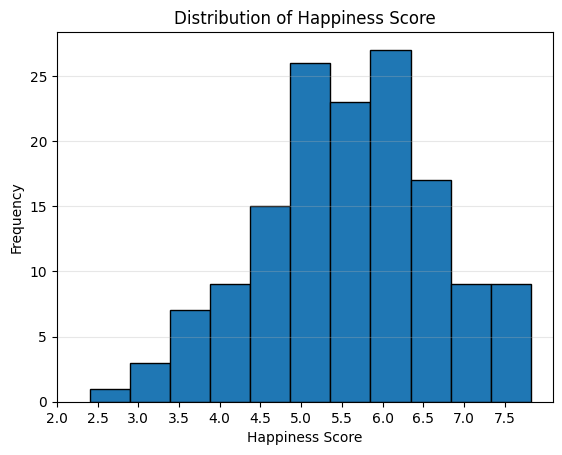

In [18]:
# histogram using matplotlib


plt.hist(df[score], bins='auto', edgecolor='black')
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.xticks(np.arange(2,8, 0.5))
plt.show()

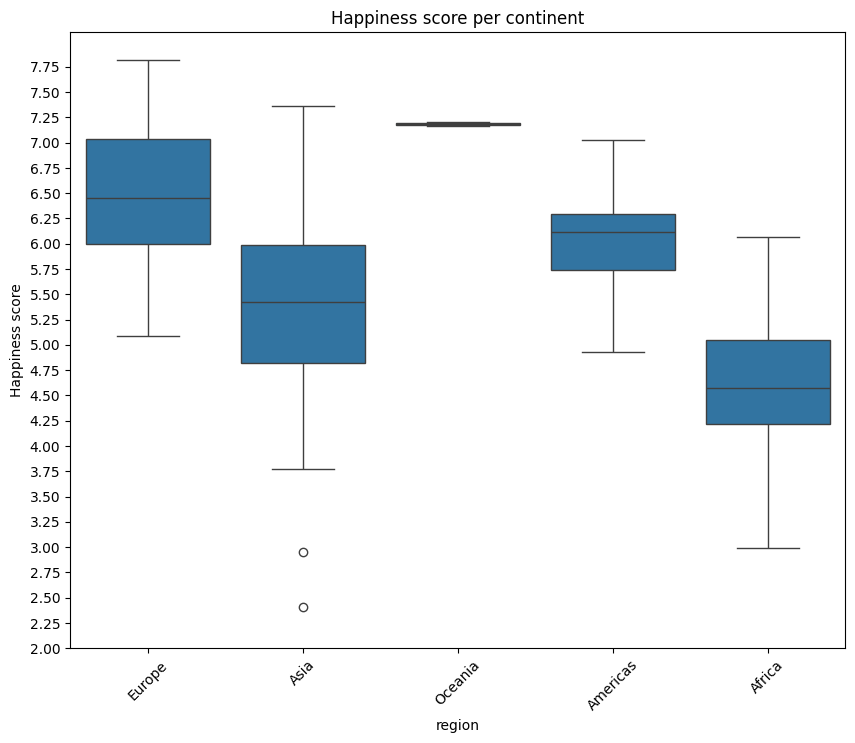

In [19]:
# boxplot of all continents using seaborn

plt.figure(figsize=(10,8))
sns.boxplot(x='region', y=score, data=df)
plt.yticks(np.arange(2,8, 0.25))
plt.xticks(rotation=45)
plt.title("Happiness score per continent")
plt.show()

In [20]:
# top 10, bottom 10 mean socre calculation

top10_mean = top10[numeric_cols].mean().to_frame(name='mean_values')
top10_mean['Group'] = 'top'
display(top10_mean)
bottom10_mean = bottom10[numeric_cols].mean().to_frame(name='mean_values')
bottom10_mean['Group'] = 'bottom'
display(bottom10_mean)


,mean_values,Group
Happiness score,7.4658,top
Whisker-high,7.5404,top
Whisker-low,7.3912,top
Dystopia (1.83) + residual,2.1912,top
Explained by: GDP per capita,1.9556,top
Explained by: Social support,1.2307,top
Explained by: Healthy life expectancy,0.7913,top
Explained by: Freedom to make life choices,0.6901,top
Explained by: Generosity,0.1940,top
Explained by: Perceptions of corruption,0.4137,top


,mean_values,Group
Happiness score,3.3391,bottom
Whisker-high,3.4927,bottom
Whisker-low,3.1858,bottom
Dystopia (1.83) + residual,0.9149,bottom
Explained by: GDP per capita,0.9336,bottom
Explained by: Social support,0.4853,bottom
Explained by: Healthy life expectancy,0.3324,bottom
Explained by: Freedom to make life choices,0.4010,bottom
Explained by: Generosity,0.1345,bottom
Explained by: Perceptions of corruption,0.1373,bottom


In [21]:
# Concating the two data frames
merged_means = pd.concat([top10_mean, bottom10_mean], axis=0)
merged_means.head()

,mean_values,Group
Happiness score,7.4658,top
Whisker-high,7.5404,top
Whisker-low,7.3912,top
Dystopia (1.83) + residual,2.1912,top
Explained by: GDP per capita,1.9556,top


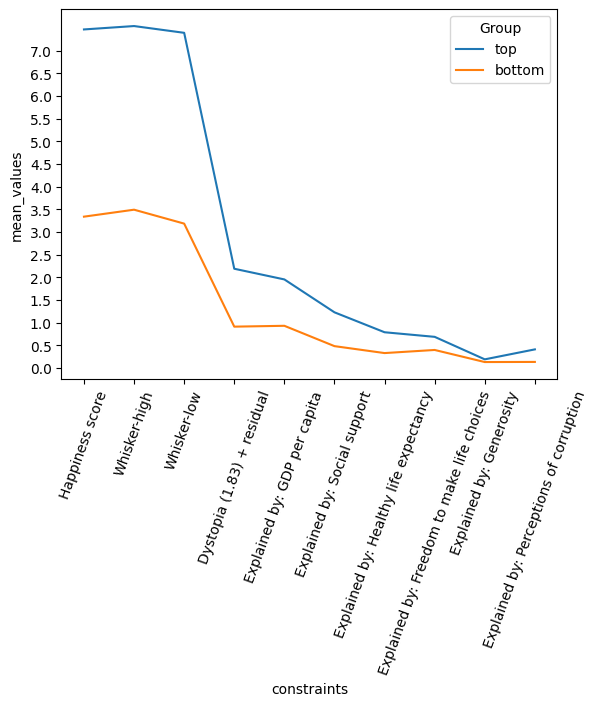

In [22]:
sns.lineplot(data=merged_means, x=merged_means.index, y='mean_values', hue='Group')
plt.xticks(rotation=70)
plt.yticks(np.arange(0,7.5,0.5))
plt.xlabel("constraints")


plt.show()

## Findings

- Majority of world's countires fall into mid-range of hapiness (4.5 to 6.5)  
- Oceania, Europe, North America are happiest  
- Africa has lowest happiness score
- Asia has wide spread and some outliers
- The average happiness socre and all contributing factors means are lower in the bottom 10 nation compared to the top 10 nations.

- Suprisingly genorisity is not a mazor factor for happiness
- The happiness socres distribution across all countires are approximately bell-shaped, but not perfect.
    - It has single peak, tail appears on both side, distribution is nearly symmetric around mean
    - There are slightly more values in lef, slight negative skew, the peak is a bit flatter 

    